In [55]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [69]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
def zero_to_nan(values):
    """Replace every 0 with 'nan' and return a copy."""
    return [float('nan') if x==0 else x for x in values]


In [57]:
filename1 = '/Users/julianthoenniss/Documents/PhD/data/ent_entropy_Jx=1.0_Jy=2.0_g=0.0_del_t=1_beta=1.0_L=30'


In [86]:
iterator = 3

times = []
time_step = 0
with h5py.File(filename1 + '.hdf5', 'r') as f:
    data_entr = f['temp_entr']
    times = data_entr[:,0]
    time_step = int(times[iterator])

print('time step:', time_step)

time step: 4


In [81]:
entangl_spectr_data = np.zeros((time_step,8*time_step))

with h5py.File(filename1 + '.hdf5', 'r') as f:
    data_entangl = f['entangl_spectr']
    
    for time_cut in range(time_step):
        entangl_spectr_data[time_cut,4*(time_step - time_cut):4*(time_step + time_cut)] = data_entangl[iterator,time_cut,0:8*time_cut]


In [82]:
data_array1 = np.zeros((time_step,2,8*time_step))

for time_cut in range (time_step):
    data_array1[time_cut, 0,:] = np.arange(8*time_step)
    data_array1[time_cut, 1,:] = entangl_spectr_data[time_cut,:8*time_step]


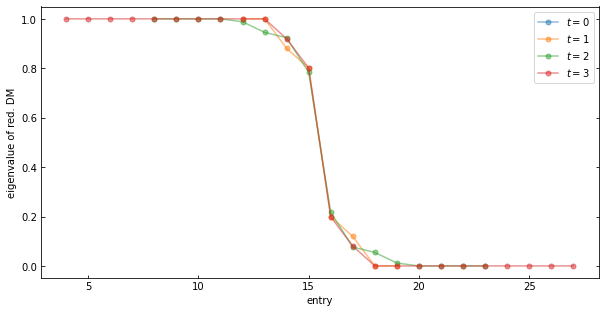

In [83]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [10, 5]

ax.set_xlabel('entry')
ax.set_ylabel('eigenvalue of red. DM')

for time_cut in range(time_step):
    ax.plot( data_array1[time_cut,0,:], zero_to_nan(data_array1[time_cut,1,:]), label=r'$t = %d$' % time_cut, marker='o', alpha=.5, ms=5)

ax.yaxis.set_ticks_position('both')
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.legend(loc="upper right")